In [1]:
%matplotlib inline
import time
from notebook_init import *

out_root = Path('out/2dim')
makedirs(out_root, exist_ok=True)
rand = lambda : np.random.randint(np.iinfo(np.int32).max)
torch.autograd.set_grad_enabled(True)

StyleGAN2: Optimized CUDA op FusedLeakyReLU not available, using native PyTorch fallback.
StyleGAN2: Optimized CUDA op UpFirDn2d not available, using native PyTorch fallback.


In [2]:
use_w = True
dataset = 'ffhq'
inst = get_instrumented_model('StyleGAN2', dataset, 'style', device, inst=inst, use_w=use_w)
model = inst.model
model.truncation = 1.0

Loading ../models/checkpoints/stylegan2/stylegan2_ffhq_1024.pt


In [3]:
seeds_ffhq = [366745668]#, 1302626592, 1235907362, 1150529896, 1881703227]
# seeds_ffhq = [427229260, 1887645531, 1635892780, 798602383, 1140578688, 427229260, 11573701 ]
# seeds_ffhq = [1302626592]#,327039870]
# seeds_ffhq = [rand() for _ in range(50)]
perturb_directions = [10, 11]
num_frames = 5
layer_mode = 'all'
perturb_intensity = 5

# Local Basis 2-dim Traversal

vertical : 10th direction, horizontal : 11th direction


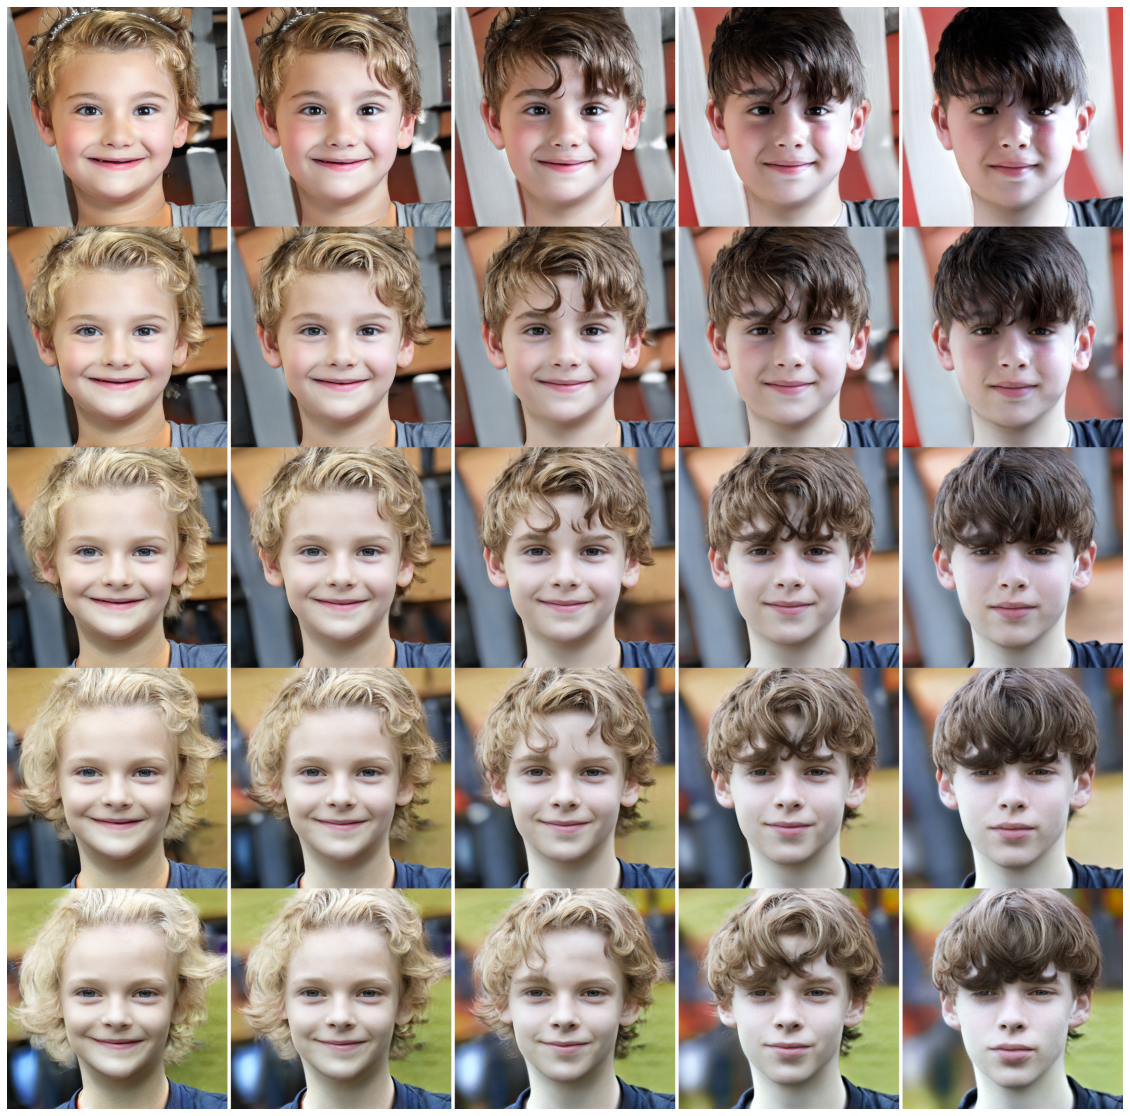

In [4]:
save_img = False

for seed in seeds_ffhq:
    layer_start, layer_end = LayerMode(layer_mode)
    rng = np.random.RandomState(seed)
    noise, z, z_local_basis, z_sv, noise_basis = get_random_local_basis(model, rng)
    
    ''' rename & reshape'''    
    local_basis = z_local_basis.t().unsqueeze(1).to(device)
    strips = []
    with torch.no_grad():
        ver_trvs_dir, hor_trvs_dir = perturb_directions
        grid = create_grid(inst, 'latent', 'style', latents=[z], x_comp=0, z_comps=[local_basis[ver_trvs_dir], local_basis[hor_trvs_dir]], act_stdev=0, 
                           lat_stdevs=[1, 1], sigma=perturb_intensity, layer_start=layer_start, layer_end=layer_end, num_frames=num_frames)
    print(f"vertical : {ver_trvs_dir}th direction, horizontal : {hor_trvs_dir}th direction")
    if save_img:
        Image.fromarray(np.uint8(grid*255)).save(out_root / f'LocalBasis_dataset_{seed}_2dim_x{perturb_axis[0]}_y{perturb_axis[1]}_ptb{perturb_intensity}.jpg')
    else:
        plt.figure(figsize=(20,40))
        plt.imshow(grid)
        plt.axis('off')
        plt.show() 

# GANSpace - Only for FFHQ

In [5]:
gs_dir = np.load('./global_directions/ganspace_directions_ffhq.npy')#Note! Only ffhq is provided.
gs_dir = torch.from_numpy(gs_dir).to(device)

vertical : 10th direction, horizontal : 11th direction


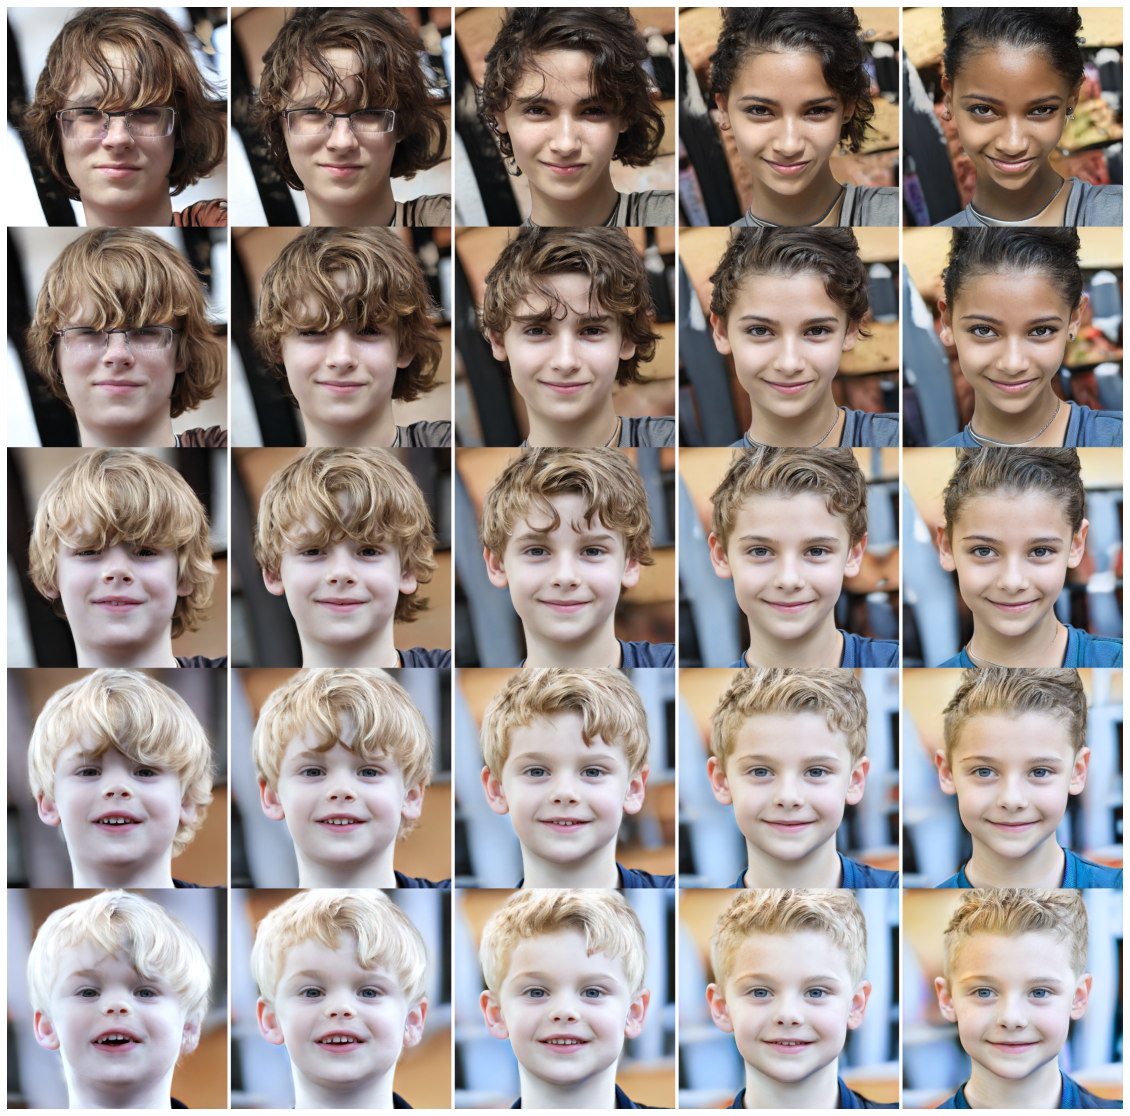

In [6]:
save_img = False

for seed in seeds_ffhq:
    rng = np.random.RandomState(seed)
    noise = torch.from_numpy(
            rng.standard_normal(512 * 1)
            .reshape(1, 512)).float().to(model.device) #[N, 512]
    if model.w_primary:
        z = model.model.style(noise)
    layer_start, layer_end = LayerMode(layer_mode)
    strips = []
    with torch.no_grad():
        ver_trvs_dir, hor_trvs_dir = perturb_directions
        grid = create_grid(inst, 'latent', 'style', latents=[z], x_comp=0, z_comps=[gs_dir[ver_trvs_dir], gs_dir[hor_trvs_dir]], act_stdev=0, 
                           lat_stdevs=[1, 1], sigma=perturb_intensity, layer_start=layer_start, layer_end=layer_end, num_frames=num_frames)
    print(f"vertical : {ver_trvs_dir}th direction, horizontal : {hor_trvs_dir}th direction")
    if save_img:
        Image.fromarray(np.uint8(grid*255)).save(out_root / f'ganspace_{seed}_2dim_x{perturb_axis[0]}_y{perturb_axis[1]}_ptb{perturb_intensity}.jpg')
    else:
        plt.figure(figsize=(20,40))
        plt.imshow(grid)
        plt.axis('off')
        plt.show() 

# SeFa - Only for FFHQ

In [7]:
sf_dir = np.load('./global_directions/sefa_directions_ffhq.npy') #Note! Only ffhq is provided.
sf_dir = torch.from_numpy(sf_dir).to(device)

vertical : 10th direction, horizontal : 11th direction


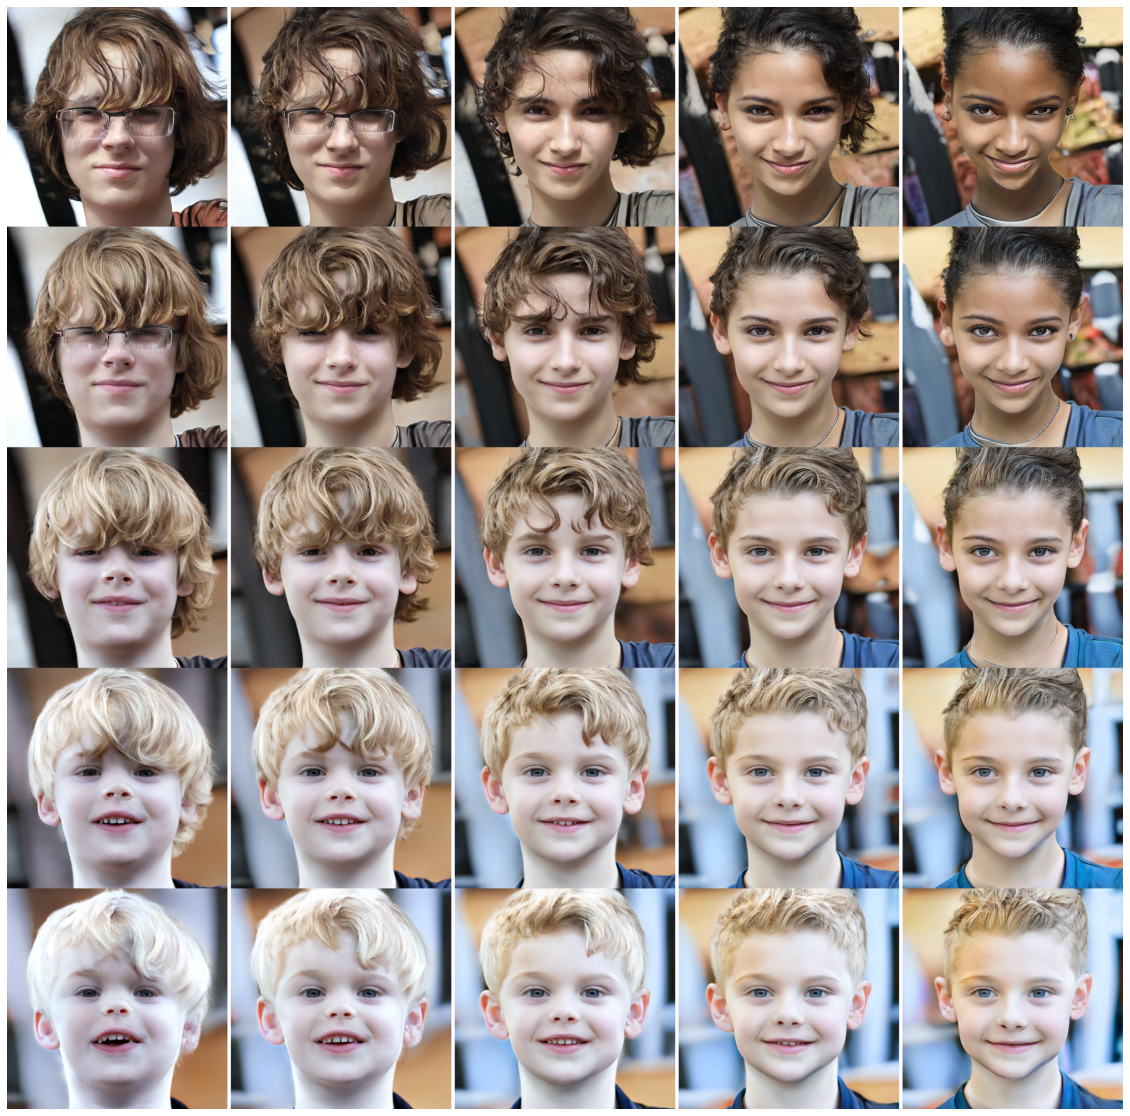

In [8]:
save_img = False

for seed in seeds_ffhq:
    rng = np.random.RandomState(seed)
    noise = torch.from_numpy(
            rng.standard_normal(512 * 1)
            .reshape(1, 512)).float().to(model.device) #[N, 512]
    if model.w_primary:
        z = model.model.style(noise)
    layer_start, layer_end = LayerMode(layer_mode)
    strips = []
    with torch.no_grad():
        ver_trvs_dir, hor_trvs_dir = perturb_directions
        grid = create_grid(inst, 'latent', 'style', latents=[z], x_comp=0, z_comps=[gs_dir[ver_trvs_dir], gs_dir[hor_trvs_dir]], act_stdev=0, 
                           lat_stdevs=[1, 1], sigma=perturb_intensity, layer_start=layer_start, layer_end=layer_end, num_frames=num_frames)
    print(f"vertical : {ver_trvs_dir}th direction, horizontal : {hor_trvs_dir}th direction")
    if save_img:
        Image.fromarray(np.uint8(grid*255)).save(out_root / f'sefa_{seed}_2dim_x{perturb_axis[0]}_y{perturb_axis[1]}_ptb{perturb_intensity}.jpg')
    else:
        plt.figure(figsize=(20,40))
        plt.imshow(grid)
        plt.axis('off')
        plt.show() 